
# 🎯 NLP Starter — Simple, Hands‑On Exercises (Beginner Friendly)

This notebook mirrors the style of "NLP for Beginners" and is designed for **first‑time learners**.
You'll do small, focused tasks and see immediate results, using only **core Python + scikit‑learn** (no heavy downloads).

**What you'll practice**
1. Inspect a tiny text dataset (built‑in, no downloads).
2. Clean text (lowercase, punctuation removal).
3. Bag‑of‑Words with `CountVectorizer`.
4. Visualize top words.
5. Train a simple classifier (Naive Bayes).
6. Switch to TF‑IDF and compare.
7. Try bigrams (optional).
8. See some misclassifications (optional).

> ✅ Tip: Each exercise has a **TODO** cell. Implement a few lines and run the check right after.


In [1]:

import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)



## 0) Tiny Sentiment Dataset (ready to use)

We use a **small in‑memory dataset** (no internet or downloads required). Labels: `1 = positive`, `0 = negative`.


In [2]:

texts = [
    "I loved this movie, it was fantastic and thrilling!",
    "What a terrible film. I regret watching it.",
    "Absolutely brilliant acting and a great story.",
    "I was bored the whole time. Not recommended.",
    "An excellent, heartwarming experience.",
    "The plot was weak and the characters were flat.",
    "A delightful surprise — funny and uplifting.",
    "It was a waste of time. Poorly made.",
    "Incredible soundtrack and strong performances.",
    "The pacing was awful. I almost fell asleep.",
    "A must-watch. I smiled from start to finish.",
    "Terrible writing and bad editing.",
    "Beautiful cinematography and touching moments.",
    "I didn't like it at all. Really disappointing.",
    "A charming film with memorable scenes.",
    "The jokes were bad and the acting was worse."
]

labels = [1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]

df = pd.DataFrame({"text": texts, "label": labels})
df.head()


,text,label
0,"I loved this movie, it was fantastic and thril...",1
1,What a terrible film. I regret watching it.,0
2,Absolutely brilliant acting and a great story.,1
3,I was bored the whole time. Not recommended.,0
4,"An excellent, heartwarming experience.",1



## 1) Exercise — Clean the text (lowercase + remove punctuation)

**Task:** Implement `clean_text(s)` that
- lowercases the string
- removes punctuation characters
- collapses multiple spaces to one

**Hint:** Use `str.translate` with `str.maketrans` to drop punctuation.


In [7]:

def clean_text(s: str) -> str:
    # TODO: 1) lowercase  2) remove punctuation  3) normalize whitespace
    # steps (replace 'pass' with your code):
    text = s.lower()
    table = str.maketrans("", "", string.punctuation)
    text = text.translate(table)
    text = re.sub(r"\s+", " ", text).strip()
    return text
    pass

# 👉 Run this after you implement clean_text
df['clean'] = df['text'].apply(clean_text)
df.head()


,text,label,clean
0,"I loved this movie, it was fantastic and thril...",1,i loved this movie it was fantastic and thrilling
1,What a terrible film. I regret watching it.,0,what a terrible film i regret watching it
2,Absolutely brilliant acting and a great story.,1,absolutely brilliant acting and a great story
3,I was bored the whole time. Not recommended.,0,i was bored the whole time not recommended
4,"An excellent, heartwarming experience.",1,an excellent heartwarming experience



## 2) Exercise — Build Bag‑of‑Words features with `CountVectorizer`

**Task:** Vectorize `df['clean']` using `CountVectorizer` with:
- `stop_words='english'`
- `min_df=1` (keep everything in this tiny dataset)

**Deliverables:** variables `cv`, `X_bow`.


In [8]:

# TODO:
cv = CountVectorizer(stop_words='english', min_df=1)
X_bow = cv.fit_transform(df['clean'])
X_bow.shape


(16, 57)


## 3) Exercise — Plot the top 10 words by frequency

**Task:** Sum term counts across all documents and plot the top 10.
- Use `np.asarray(X_bow.sum(axis=0)).ravel()` to get totals per column.
- Get feature names with `cv.get_feature_names_out()`.
- Use `matplotlib` (one bar chart, no custom colors).


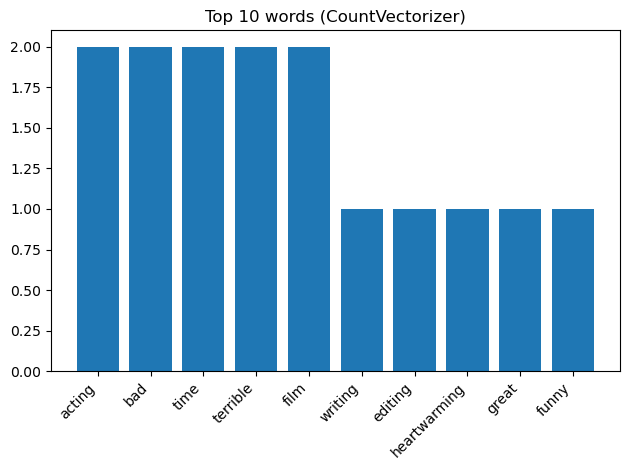

In [9]:

# TODO:
totals = np.asarray(X_bow.sum(axis=0)).ravel()
vocab = cv.get_feature_names_out()
top_idx = np.argsort(totals)[-10:][::-1]
plt.figure()
plt.bar(range(10), totals[top_idx])
plt.xticks(range(10), vocab[top_idx], rotation=45, ha='right')
plt.title("Top 10 words (CountVectorizer)")
plt.tight_layout()
plt.show()



## 4) Exercise — Train/test split + Naive Bayes

**Task:** Split into train/test (`test_size=0.25`, `random_state=RANDOM_SEED`), then train **MultinomialNB** on **Bag‑of‑Words** and report **accuracy**.


In [10]:

# TODO:
X_train, X_test, y_train, y_test = train_test_split(X_bow, df['label'], test_size=0.25, random_state=RANDOM_SEED, stratify=df['label'])
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("Accuracy (NB + BoW):", accuracy_score(y_test, y_pred))


Accuracy (NB + BoW): 0.5



## 5) Exercise — TF‑IDF features + Naive Bayes

**Task:** Create `TfidfVectorizer(stop_words='english', min_df=1)` on `df['clean']`, train **MultinomialNB**, and compare accuracy to BoW.


In [ ]:

# TODO:
tfidf = TfidfVectorizer(stop_words='english', min_df=1)
X_tfidf = tfidf.fit_transform(df['clean'])
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['label'], test_size=0.25, random_state=RANDOM_SEED, stratify=df['label'])
nb2 = MultinomialNB()
nb2.fit(X_train, y_train)
y_pred2 = nb2.predict(X_test)
print("Accuracy (NB + TF-IDF):", accuracy_score(y_test, y_pred2))



## 6) (Optional) Exercise — Add bigrams and compare

**Task:** Use `TfidfVectorizer(ngram_range=(1,2), stop_words='english')` and compare accuracy.


In [ ]:

# TODO:
# tfidf_bigram = TfidfVectorizer(ngram_range=(1,2), stop_words='english', min_df=1)
# X_tfidf_bg = tfidf_bigram.fit_transform(df['clean'])
# X_train, X_test, y_train, y_test = train_test_split(X_tfidf_bg, df['label'], test_size=0.25, random_state=RANDOM_SEED, stratify=df['label'])
# nb_bg = MultinomialNB()
# nb_bg.fit(X_train, y_train)
# y_pred_bg = nb_bg.predict(X_test)
# print("Accuracy (NB + TF-IDF bigrams):", accuracy_score(y_test, y_pred_bg))



## 7) (Optional) Exercise — Try Logistic Regression

**Task:** Using your best features (TF‑IDF or TF‑IDF bigrams), train `LogisticRegression(max_iter=1000)` and compare accuracy.


In [ ]:

# TODO:
# logreg = LogisticRegression(max_iter=1000)
# logreg.fit(X_train, y_train)
# y_pred_lr = logreg.predict(X_test)
# print("Accuracy (LogReg):", accuracy_score(y_test, y_pred_lr))



## 8) (Optional) Exercise — Inspect a few mistakes

**Task:** Print 5 examples where `y_pred != y_test` to understand what confused the model.


In [ ]:

# TODO (requires you to keep X_test/y_test/y_pred from a previous run):
# test_idx = y_test.index.to_list()
# mis_idx = [i for i, yp, yt in zip(test_idx, y_pred, y_test) if yp != yt]
# for i in mis_idx[:5]:
#     print(f"[label={y_test.loc[i]}] {df.loc[i, 'text']}")
